In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
file_path = "bigmart.csv"
df = pd.read_csv(file_path)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
median_Item_Weight = df['Item_Weight'].median()
df['Item_Weight'].fillna(median_Item_Weight,inplace=True)
mode_Outlet_Size = df['Outlet_Size'].mode()[0]
df['Outlet_Size'].fillna(mode_Outlet_Size,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


C:\Users\Saket Rama\AppData\Local\Temp\ipykernel_38456\798724250.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(median_Item_Weight,inplace=True)


In [7]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [16]:
df = df.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [17]:
encoder = LabelEncoder()
for col in ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']:
    df[col] = encoder.fit_transform(df[col])
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,4,249.8092,1,0,1,3735.1380
1,5.92,2,0.019278,14,48.2692,1,2,2,443.4228
2,17.50,1,0.016760,10,141.6180,1,0,1,2097.2700
3,19.20,2,0.000000,6,182.0950,1,2,0,732.3800
4,8.93,1,0.000000,9,53.8614,0,2,1,994.7052


In [23]:
scaler = StandardScaler()
df[['Item_Weight','Item_Visibility','Item_MRP']] = scaler.fit_transform(df[['Item_Weight','Item_Visibility','Item_MRP']])
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-0.831187,1,-0.970732,4,1.747454,1,0,1,3735.1380
1,-1.630810,2,-0.908111,14,-1.489023,1,2,2,443.4228
2,1.108727,1,-0.956917,10,0.010040,1,0,1,2097.2700
3,1.510904,2,-1.281758,6,0.660050,1,2,0,732.3800
4,-0.918719,1,-1.281758,9,-1.399220,0,2,1,994.7052


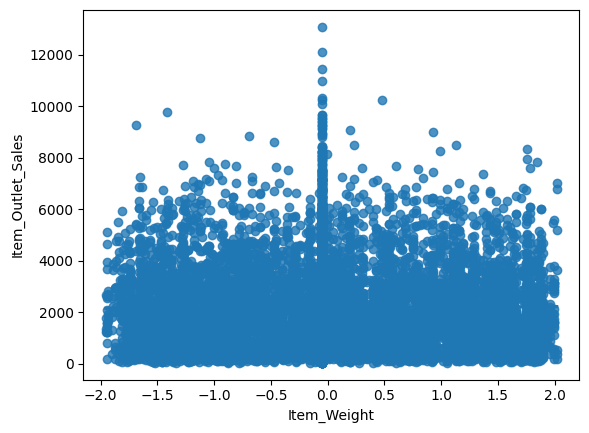

In [24]:
sns.regplot(data=df,x='Item_Weight',y='Item_Outlet_Sales')
plt.show()

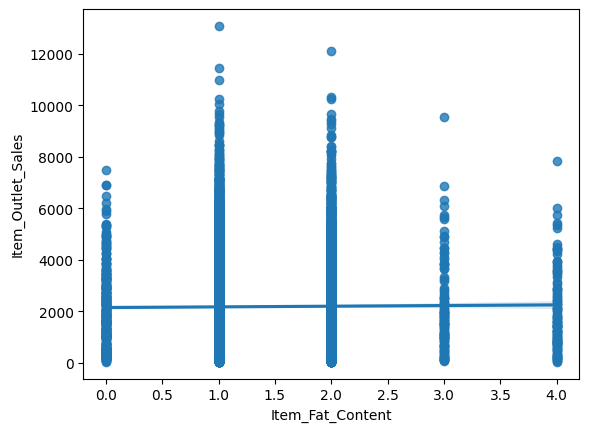

In [25]:
sns.regplot(data=df,x='Item_Fat_Content',y='Item_Outlet_Sales')
plt.show()

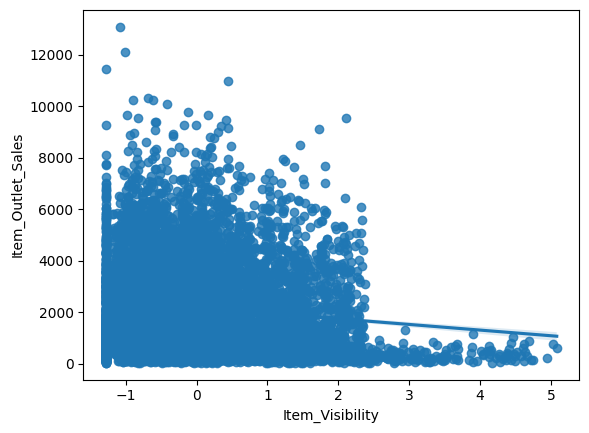

In [26]:
sns.regplot(data=df,x='Item_Visibility',y='Item_Outlet_Sales')
plt.show()

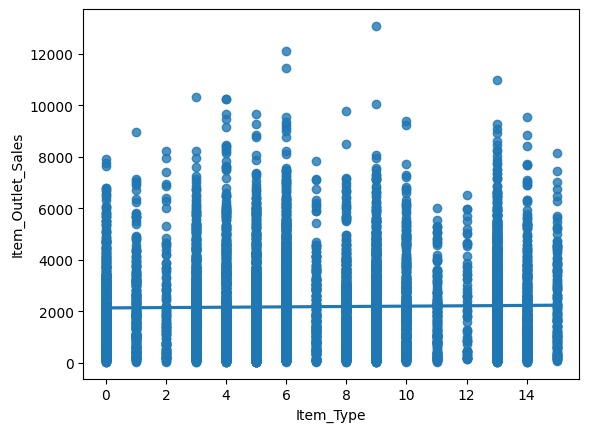

In [27]:
sns.regplot(data=df,x='Item_Type',y='Item_Outlet_Sales')
plt.show()

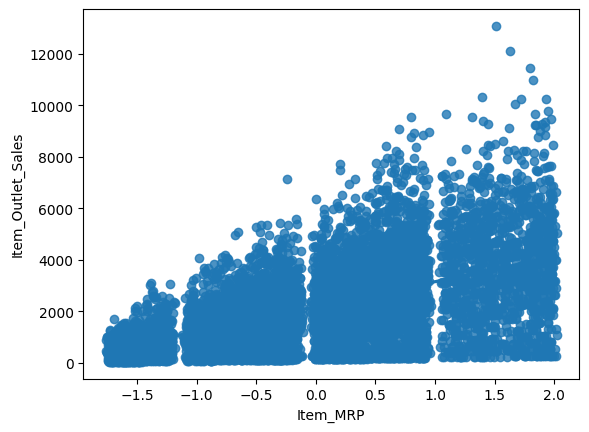

In [28]:
sns.regplot(data=df,x='Item_MRP',y='Item_Outlet_Sales')
plt.show()

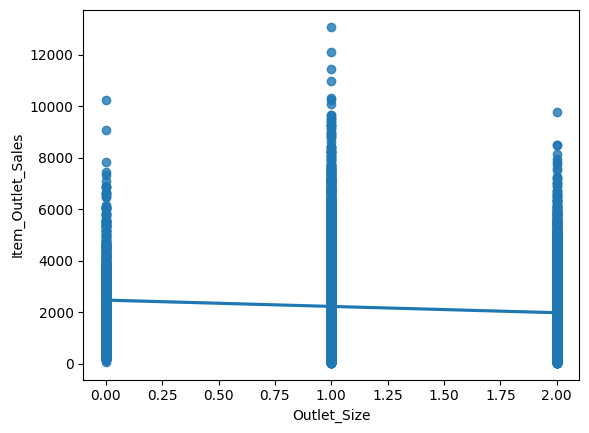

In [30]:
sns.regplot(data=df,x='Outlet_Size',y='Item_Outlet_Sales')
plt.show()

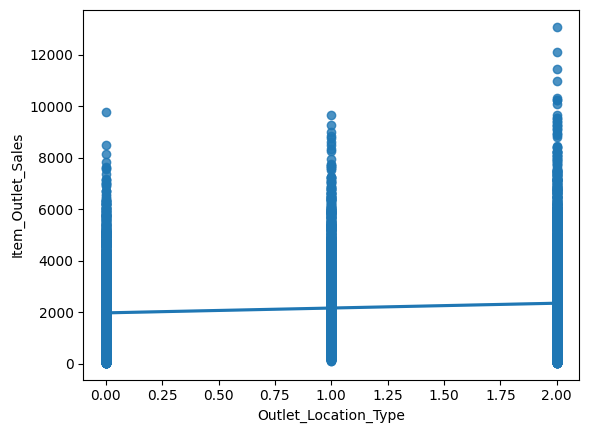

In [31]:
sns.regplot(data=df,x='Outlet_Location_Type',y='Item_Outlet_Sales')
plt.show()

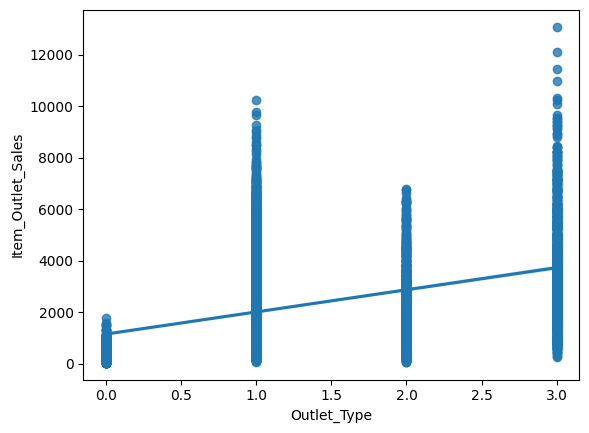

In [32]:
sns.regplot(data=df,x='Outlet_Type',y='Item_Outlet_Sales')
plt.show()

In [34]:
X=df.drop(['Item_Outlet_Sales'],axis=1)
y=df['Item_Outlet_Sales']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [36]:
reg = LinearRegression()

In [37]:
reg.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred = reg.predict(X_test)

In [39]:
mean_absolute_error(y_test,y_pred)

921.4691189023548

In [ ]:
mean_squared_error(y_test,y_pred)

1476963.6350985558

In [41]:
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(1215.3039270481092)

In [43]:
r2_score(y_test,y_pred)

0.5070404165765001

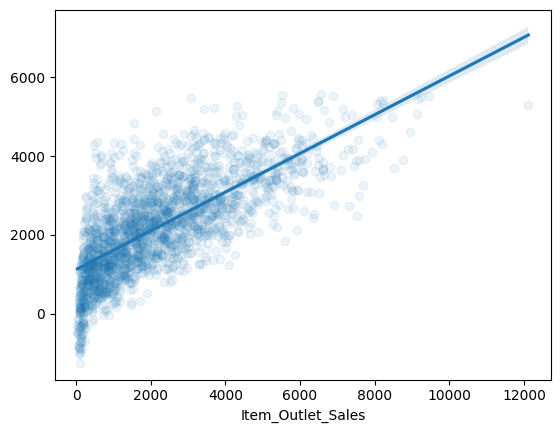

In [47]:
sns.regplot(x=y_test,y=y_pred,data=df,scatter_kws={'alpha':0.08})
plt.show()
 